In [7]:
from scipy import stats
import os
import sys
sys.path.append('..')
import seaborn as sns
from utils.tracking_analysis.tracking_plotting import *
from set_global_params import raw_tracking_path, processed_data_path, change_over_time_mice
from utils.reaction_time_utils import get_bpod_trial_nums_per_session
from utils.post_processing_utils import get_all_experimental_records
from utils.post_processing_utils import remove_exps_after_manipulations, remove_unsuitable_recordings, remove_manipulation_days
from utils.plotting_visuals import makes_plots_pretty

In [8]:
def get_session_with_10000th_trial(mouse, experiments):
    dates = experiments[experiments['mouse_id']==mouse]['date'].unique()
    session_starts = get_bpod_trial_nums_per_session(mouse, dates)
    if session_starts[-1] >= 10000:
        last_session_idx = np.where(np.asarray(session_starts) >=10000)[0][0]
    else:
        last_session_idx = -1
    last_session_date = dates[last_session_idx]
    return(last_session_date)

C:\Users\francescag\AppData\Local\Temp\ipykernel_13000\830740494.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
C:\Users\francescag\AppData\Local\Continuum\miniconda3\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\francescag\AppData\Local\Temp\ipykernel_13000\830740494.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

removing SNL_photo21: ['20200829' '20200830' '20200831' '20200908' '20200915' '20201008'
 '20201009']


C:\Users\francescag\AppData\Local\Temp\ipykernel_13000\830740494.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
C:\Users\francescag\AppData\Local\Continuum\miniconda3\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


removing SNL_photo22: ['20200829' '20200830' '20200831' '20200908' '20200915' '20201008'
 '20201009']


C:\Users\francescag\AppData\Local\Temp\ipykernel_13000\830740494.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
C:\Users\francescag\AppData\Local\Continuum\miniconda3\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


removing SNL_photo26: ['20200829' '20200830' '20200831' '20200908' '20200915' '20201008'
 '20201009']


C:\Users\francescag\AppData\Local\Temp\ipykernel_13000\830740494.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
C:\Users\francescag\AppData\Local\Continuum\miniconda3\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


<AxesSubplot:xlabel='days_since_last', ylabel='APE peaks'>

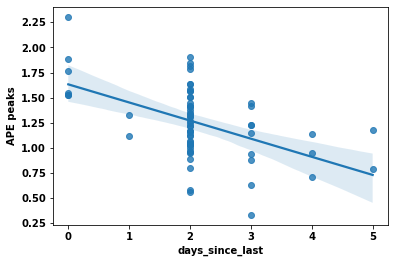

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

# Define the recording site
recording_site = 'tail'

# Initialize an empty DataFrame to accumulate data for all mice
all_mice_data = pd.DataFrame()

for mouse in change_over_time_mice[recording_site]:
    all_experiments = get_all_experimental_records()
    all_experiments = remove_exps_after_manipulations(all_experiments, [mouse])
    all_experiments = remove_manipulation_days(all_experiments)
    all_experiments = remove_unsuitable_recordings(all_experiments)
    
    # Filter experiments based on mouse ID and recording site
    experiments_to_process = all_experiments[
        (all_experiments['mouse_id'] == mouse) & (all_experiments['recording_site'] == recording_site)]
    last_session = get_session_with_10000th_trial(mouse, experiments_to_process)
    dates = experiments_to_process['date'].values
    last_session_ind = int(np.where(dates == last_session)[0])
    
    # Loop through each session date
    for i, date in enumerate(dates[0: last_session_ind + 1]):
        save_out_folder = os.path.join(raw_tracking_path, mouse, date)
        movement_param_file = os.path.join(save_out_folder, f'APE_tracking{mouse}_{date}.pkl')
        
        if os.path.isfile(movement_param_file):
            session_data = pd.read_pickle(movement_param_file)
            session_data['date'] = date
            session_data['mouse'] = mouse
            if i == 0:
                all_session_data = session_data
            else:
                all_session_data = pd.concat([all_session_data, session_data])
        else:
            print(f'{date} not found')
    
    # Reset index for combined session data and filter for 'contra' side
    all_session_data = all_session_data.reset_index(drop=True)
    contra_data = all_session_data[all_session_data.side == 'contra']

    # Process 'contra' data to calculate days since last session
    contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
    unique_dates = contra_data.drop_duplicates(subset='datetime', keep='last').copy()
    unique_dates['days_since_last'] = unique_dates['datetime'].diff().dt.days
    contra_data = pd.merge(contra_data, unique_dates[['datetime', 'days_since_last']], on='datetime', how='left')
    contra_data['days_since_last'] = contra_data['days_since_last'].fillna(0).astype(int)

    # Extract required columns for plotting
    APE_data = contra_data[['days_since_last', 'APE peaks', 'date']].copy()
    mean_session_APE = APE_data.groupby('date')[['days_since_last', 'APE peaks']].apply(np.mean)

    # Append to the cumulative DataFrame for all mice
    all_mice_data = pd.concat([all_mice_data, mean_session_APE])

# Plot after processing all mice data
sns.regplot(data=all_mice_data, x='days_since_last', y='APE peaks')


In [11]:
# Plot after processing all mice data
sns.lmplot(data=all_mice_data, x='days_since_last', y='APE peaks', hue='mouse', legend=False)

KeyError: "['mouse'] not in index"

[False False False False False False False False  True  True  True]
20200210 (301, 50)
20200213 (281, 50)
20200218 (282, 50)
20200220 (367, 50)
20200224 (286, 50)
20200227 (266, 50)
20200303 (303, 50)
20200305 (291, 50)
20200307 (292, 50)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\3120956931.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
C:\Users\francescag\AppData\Local\Continuum\miniconda3\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[False False False False False False False False False False False False
 False False  True]
20200204 (145, 50)
20200206 (208, 50)
20200208 (439, 50)
20200210 (246, 50)
20200212 (222, 50)
20200214 (265, 50)
20200218 (358, 50)
20200221 (289, 50)
20200224 (238, 50)
20200226 (267, 50)
20200228 (251, 50)
20200303 (298, 50)
20200305 (279, 50)
20200307 (304, 50)
20200310 (278, 50)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\3120956931.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
C:\Users\francescag\AppData\Local\Continuum\miniconda3\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


8071
20200223 (87, 50)
20200226 (267, 50)
20200228 (273, 50)
20200229 (344, 50)
20200303 (315, 50)
20200305 (293, 50)
20200307 (306, 50)
20200310 (341, 50)
20200312 (245, 50)
20200313 (278, 50)
20200316 (278, 50)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\3120956931.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
C:\Users\francescag\AppData\Local\Continuum\miniconda3\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


removing SNL_photo21: ['20200829' '20200830' '20200831' '20200908' '20200915' '20201008'
 '20201009']
7929
20200806 (208, 50)
20200808 (355, 50)
20200810 (355, 50)
20200812 (359, 50)
20200814 (284, 50)
20200816 (306, 50)
20200818 (212, 50)
20200820 (232, 50)
20200822 (263, 50)
20200824 (293, 50)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\3120956931.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
C:\Users\francescag\AppData\Local\Continuum\miniconda3\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


removing SNL_photo22: ['20200829' '20200830' '20200831' '20200908' '20200915' '20201008'
 '20201009']
9720
20200808 (461, 50)
20200810 (314, 50)
20200812 (296, 50)
20200814 (258, 50)
20200816 (333, 50)
20200818 (337, 50)
20200820 (299, 50)
20200822 (187, 50)
20200824 (241, 50)
20200826 (270, 50)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\3120956931.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
C:\Users\francescag\AppData\Local\Continuum\miniconda3\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


removing SNL_photo26: ['20200829' '20200830' '20200831' '20200908' '20200915' '20201008'
 '20201009']
8010
20200808 (191, 50)
20200810 (471, 50)
20200812 (390, 50)
20200814 (363, 50)
20200816 (374, 50)
20200818 (217, 50)
20200820 (376, 50)
20200822 (345, 50)
20200824 (524, 50)
20200826 (443, 50)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\3120956931.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')
C:\Users\francescag\AppData\Local\Continuum\miniconda3\envs\py38\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


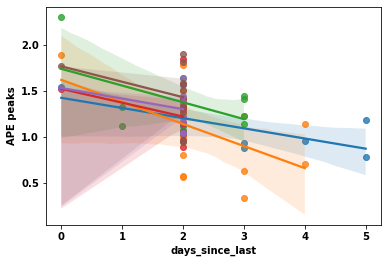

In [59]:
recording_site = 'tail'
for mouse in change_over_time_mice[recording_site]:
    all_experiments = get_all_experimental_records()
    all_experiments = remove_exps_after_manipulations(all_experiments, [mouse])
    all_experiments = remove_manipulation_days(all_experiments)
    all_experiments = remove_unsuitable_recordings(all_experiments)
    experiments_to_process = all_experiments[
        (all_experiments['mouse_id'] == mouse) & (all_experiments['recording_site'] == recording_site)]
    last_session = get_session_with_10000th_trial(mouse, experiments_to_process)
    dates = experiments_to_process['date'].values
    last_session_ind = int(np.where(dates == last_session)[0])
    for i, date in enumerate(dates[0: last_session_ind + 1]):
        save_out_folder = os.path.join(raw_tracking_path, mouse, date)
        movement_param_file = os.path.join(save_out_folder, 'APE_tracking{}_{}.pkl'.format(mouse, date))
        if os.path.isfile(movement_param_file):
            session_data = pd.read_pickle(movement_param_file)
            session_data['date'] = date
            session_data.mouse = mouse
            print(date, session_data.shape)
            if i == 0:
                all_session_data = session_data
            else:
                all_session_data = pd.concat([all_session_data, session_data])
        else:
            print('{} not found'.format(date))
    all_session_data = all_session_data.reset_index(drop=True)
    contra_data = all_session_data[all_session_data.side == 'contra']


    # Assuming contra_data is already defined
    # Convert the 'date' column to datetime format
    contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')

    # Create a new dataframe with unique dates and their differences
    unique_dates = contra_data.drop_duplicates(subset='datetime', keep='last').copy()

    # Calculate the difference between consecutive unique dates
    unique_dates['days_since_last'] = unique_dates['datetime'].diff().dt.days

    # Merge the calculated differences back into the original dataframe
    contra_data = pd.merge(contra_data, unique_dates[['datetime', 'days_since_last']], on='datetime', how='left')

    # Fill the first row NaN with 0 or any desired value
    contra_data['days_since_last'] = contra_data['days_since_last'].fillna(0).astype(int)
    APE_data = contra_data[['days_since_last', 'APE peaks', 'date']].copy()
    mean_session_APE = APE_data.groupby('date')[['days_since_last', 'APE peaks']].apply(np.mean)
    sns.regplot(data=mean_session_APE,x='days_since_last', y='APE peaks' )

[False False False False False False False False  True  True  True]
20200210 (301, 51)
20200213 (281, 51)
20200218 (282, 51)
20200220 (367, 51)
20200224 (286, 51)
20200227 (266, 51)
20200303 (303, 51)
20200305 (291, 51)
20200307 (292, 51)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\2066216670.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')


[False False False False False False False False False False False False
 False False  True]
20200204 (145, 51)
20200206 (208, 51)
20200208 (439, 51)
20200210 (246, 51)
20200212 (222, 51)
20200214 (265, 51)
20200218 (358, 51)
20200221 (289, 51)
20200224 (238, 51)
20200226 (267, 51)
20200228 (251, 51)
20200303 (298, 51)
20200305 (279, 51)
20200307 (304, 51)
20200310 (278, 51)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\2066216670.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')


8071
20200223 (87, 51)
20200226 (267, 51)
20200228 (273, 51)
20200229 (344, 51)
20200303 (315, 51)
20200305 (293, 51)
20200307 (306, 51)
20200310 (341, 51)
20200312 (245, 51)
20200313 (278, 51)
20200316 (278, 51)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\2066216670.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')


removing SNL_photo21: ['20200829' '20200830' '20200831' '20200908' '20200915' '20201008'
 '20201009']
7929
20200806 (208, 51)
20200808 (355, 51)
20200810 (355, 51)
20200812 (359, 51)
20200814 (284, 51)
20200816 (306, 51)
20200818 (212, 51)
20200820 (232, 51)
20200822 (263, 51)
20200824 (293, 51)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\2066216670.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')


removing SNL_photo22: ['20200829' '20200830' '20200831' '20200908' '20200915' '20201008'
 '20201009']
9720
20200808 (461, 51)
20200810 (314, 51)
20200812 (296, 51)
20200814 (258, 51)
20200816 (333, 51)
20200818 (337, 51)
20200820 (299, 51)
20200822 (187, 51)
20200824 (241, 51)
20200826 (270, 51)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\2066216670.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')


removing SNL_photo26: ['20200829' '20200830' '20200831' '20200908' '20200915' '20201008'
 '20201009']
8010
20200808 (191, 51)
20200810 (471, 51)
20200812 (390, 51)
20200814 (363, 51)
20200816 (374, 51)
20200818 (217, 51)
20200820 (376, 51)
20200822 (345, 51)
20200824 (524, 51)
20200826 (443, 51)


C:\Users\francescag\AppData\Local\Temp\ipykernel_13020\2066216670.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')


Data saved to APE_peak_differences_all_mice.csv


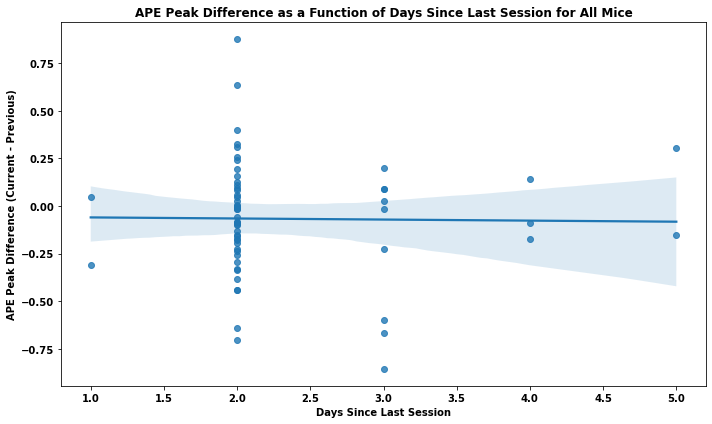

In [63]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store the processed data for all mice
all_mice_data = []

# Loop through all the mice in the `change_over_time_mice` for the given recording site
for mouse in change_over_time_mice[recording_site]:
    all_experiments = get_all_experimental_records()
    all_experiments = remove_exps_after_manipulations(all_experiments, [mouse])
    all_experiments = remove_manipulation_days(all_experiments)
    all_experiments = remove_unsuitable_recordings(all_experiments)
    experiments_to_process = all_experiments[
        (all_experiments['mouse_id'] == mouse) & (all_experiments['recording_site'] == recording_site)]
    
    last_session = get_session_with_10000th_trial(mouse, experiments_to_process)
    dates = experiments_to_process['date'].values
    last_session_ind = int(np.where(dates == last_session)[0])

    # Initialize an empty list to accumulate session data for the current mouse
    all_session_data_list = []

    for i, date in enumerate(dates[0: last_session_ind + 1]):
        save_out_folder = os.path.join(raw_tracking_path, mouse, date)
        movement_param_file = os.path.join(save_out_folder, 'APE_tracking{}_{}.pkl'.format(mouse, date))
        
        if os.path.isfile(movement_param_file):
            session_data = pd.read_pickle(movement_param_file)
            session_data['date'] = date
            session_data['mouse'] = mouse
            print(date, session_data.shape)
            all_session_data_list.append(session_data)
        else:
            print('{} not found'.format(date))

    # Concatenate all session data for this mouse
    all_session_data = pd.concat(all_session_data_list, ignore_index=True)
    contra_data = all_session_data[all_session_data.side == 'contra']

    # Convert the 'date' column to datetime format
    contra_data['datetime'] = pd.to_datetime(contra_data['date'], format='%Y%m%d')

    # Create a new dataframe with unique dates and their differences
    unique_dates = contra_data.drop_duplicates(subset='datetime', keep='last').copy()

    # Calculate the difference between consecutive unique dates
    unique_dates['days_since_last'] = unique_dates['datetime'].diff().dt.days
    unique_dates['last_session_date'] = unique_dates['date'].shift(1)

    # Merge the calculated differences back into the original dataframe
    contra_data = pd.merge(contra_data, unique_dates[['datetime', 'days_since_last', 'last_session_date']], on='datetime', how='left')
    contra_data['last_session_date'] = contra_data['last_session_date'].fillna(pd.NaT)

    # Fill the first row NaN with 0 or any desired value
    contra_data['days_since_last'] = contra_data['days_since_last'].fillna(0).astype(int)

    # Compute mean APE peaks for each session (date)
    APE_data = contra_data[['date', 'APE peaks', 'days_since_last', 'last_session_date']].copy()
    mean_session_APE = APE_data.groupby('date').agg({'APE peaks': 'mean', 'days_since_last': 'mean'}).reset_index()

    # Shift the mean APE peak by one session to get the previous session's APE peak
    mean_session_APE['previous_APE_peak'] = mean_session_APE['APE peaks'].shift(1)

    # Calculate the difference in APE peak between current and previous session
    mean_session_APE['APE_peak_difference'] = mean_session_APE['APE peaks'] - mean_session_APE['previous_APE_peak']

    # Drop the first row since it has no previous session to compare
    mean_session_APE = mean_session_APE.dropna(subset=['APE_peak_difference'])

    # Add mouse ID to the data for tracking
    mean_session_APE['mouse'] = mouse

    # Append the processed data for this mouse to the list
    all_mice_data.append(mean_session_APE)

# Concatenate data for all mice into a single DataFrame
all_mice_data_df = pd.concat(all_mice_data, ignore_index=True)


<Figure size 720x432 with 0 Axes>

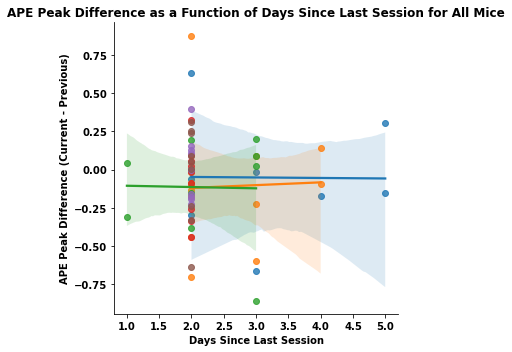

In [67]:

# Plot the APE peak difference as a function of days since last session for all mice
plt.figure(figsize=(10, 6))
sns.lmplot(data=all_mice_data_df, x='days_since_last', y='APE_peak_difference', hue='mouse', legend=False)
plt.xlabel('Days Since Last Session')
plt.ylabel('APE Peak Difference (Current - Previous)')
plt.title('APE Peak Difference as a Function of Days Since Last Session for All Mice')
plt.tight_layout()
plt.show()
